# 다중 회귀 분석(Multivariate Regression)
### 독립변수가 2개 이상

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 자동차 연비 데이터셋 가져오기
df = pd.read_csv('auto-mpg.csv', header=None)
print(df)                        # 컬럼 번호로 출력 ( 0 ~ 8 )

        0  1      2      3       4     5   6  7                          8
0    18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1    15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2    18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3    16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4    17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino
..    ... ..    ...    ...     ...   ...  .. ..                        ...
393  27.0  4  140.0  86.00  2790.0  15.6  82  1            ford mustang gl
394  44.0  4   97.0  52.00  2130.0  24.6  82  2                  vw pickup
395  32.0  4  135.0  84.00  2295.0  11.6  82  1              dodge rampage
396  28.0  4  120.0  79.00  2625.0  18.6  82  1                ford ranger
397  31.0  4  119.0  82.00  2720.0  19.4  82  1                 chevy s-10

[398 rows x 9 columns]


In [3]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

In [4]:
# 데이터 살펴보기
print(df.head())                # 앞에서 5개의 데이터 출력

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [5]:
# 데이터 자료형 확인
print(df.info())                # horsepower컬럼  object(문자형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [6]:
# 데이터 통계 요약정보 확인
print(df.describe())            # horsepower컬럼  object(문자형) 출력안됨

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [7]:
# horsepower 열의 고유값 확인 : ['130.0' '165.0' '150.0' '140.0' ...]
print(df['horsepower'].unique())           # horsepower 열의 고유값 확인
print('\n')                                # horsepower 열의 자료형 object(문자형)

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']




In [8]:
# horsepower 열의 자료형 변경 (문자형 ->실수형)
# inplace 옵션이 True이면, 명령어를 실행 한 후 메소드가 적용된 데이터 프레임으로 반환 한다.
df['horsepower'].replace('?', np.nan, inplace=True)     # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)  # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')     # 문자형을 실수형으로 변환

In [9]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

In [10]:
# 독립변수와 종속변수 선택
x=ndf[['cylinders', 'horsepower', 'weight']]    # 독립 변수 : cylinders, horsepower, weight
y=ndf['mpg']                                    # 종속 변수 y

In [11]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [12]:
print('훈련 데이터: ', x_train.shape)            # 훈련 데이터:  (274, 3)
print('검증 데이터: ', x_test.shape)             # 검증 데이터:  (118, 3)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [13]:
print('x_train:', x_train)
print('x_test:', x_test)

x_train:      cylinders  horsepower  weight
38           8       165.0  4209.0
172          4        71.0  2223.0
277          6       133.0  3410.0
196          4        60.0  2164.0
357          4       100.0  2615.0
..         ...         ...     ...
375          4        74.0  1980.0
322          4        65.0  2110.0
15           6        95.0  2833.0
127          6       100.0  2901.0
267          4        95.0  2560.0

[274 rows x 3 columns]
x_test:      cylinders  horsepower  weight
243          3       110.0  2720.0
371          4        84.0  2525.0
300          8        90.0  3420.0
345          4        60.0  1760.0
265          8       140.0  4080.0
..         ...         ...     ...
384          4        67.0  1965.0
20           4        87.0  2672.0
189          8       120.0  3962.0
60           4        90.0  2408.0
227          6       100.0  3630.0

[118 rows x 3 columns]


In [14]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

In [15]:
# 단순회귀분석 모델 객체 생성
model = LinearRegression()                      # 모델 만들기

In [16]:
# train data를 가지고 모델 학습
model.fit(x_train, y_train)                    # 모델 학습

LinearRegression()

In [17]:
# 모델 평가
# 모델 학습이 완료된 다음에 검증데이터(x_test, y_test)를 사용하여 회귀 모델의 
# 평가지표인 결정계수(R-제곱) 계산
r_square = model.score(x_test, y_test)
print(r_square)                             # 결정계수 : 0.6939048496695597

# 다중회귀분석 결정계수 : 0.6939048496695597
# 다중회귀분석을 했을때 모델의 성능 지표인 결정계수값은 0.6939048496695597 으로
# 비교적 양호한 수준이다.

0.6939048496695597


In [18]:
# 회귀식의 회귀계수(기울기) : 독립변수 3개의 기울기가 리스트로 리턴됨
print('x 변수의 회귀계수 a: ', model.coef_) 

x 변수의 회귀계수 a:  [-0.60691288 -0.03714088 -0.00522268]


In [19]:
# 회귀식의 y절편
print('상수항 b', model.intercept_)            

상수항 b 46.41435126963408


In [20]:
# 모델 예측
y_hat = model.predict(x_test)                  # 예측값 구하기
print(y_hat)

[26.30243119 27.67960352 20.35480988 32.5663334  15.05079818 18.65250234
 16.5189694   8.21482855 30.00898418 28.56105525 21.63593175 22.17449944
 26.73546308 27.06911576 13.10907653 16.81024194 24.07783306 29.38394295
 11.27643241 10.64851363 12.83398787 30.95656774 23.11048993 14.9956607
 16.14345244  9.63707709 19.31184005 30.31070208 22.37815073 25.60054305
 22.17386758 22.66539802 27.34304014 24.03375623 23.58227736 30.06694949
 31.83692148 20.6513051  16.26186076 26.65768848 22.66017535 23.58573705
 30.31476048 24.14617908 23.74689385 11.7401859  14.8546484  31.8171619
 22.76694089 29.65204595 28.81465448 11.37686071 23.72676593 13.75497533
 16.3454236  23.8068028  23.83990186 29.99153659 30.15796496 26.51261777
 31.02273271 27.92508595 20.72312738 23.67799884 26.50273798 32.31273417
  9.89019362 25.48444753 23.64014488 14.31205545 10.87368749 29.35262346
 25.75065578 30.7807431  29.89694625 24.8482802  21.93884707 13.90004603
 32.09399697 31.0529045  31.23569823 11.40759807 26.0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


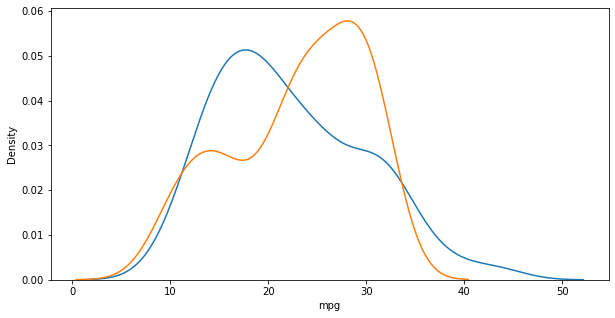

In [21]:
# 모델이 예측한값(y_hat)과 실제값(y_test) 분포 비교

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")          # 실제값
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)    # 예측값
plt.show()
plt.close()

# 1.단순회귀분석의 결과와 비교할 때 데이터가 어는 한쪽으로 편향되는 경향은 그대로
#   남아 있지만 그래프의 첨도(뽀족한 정도)가 약간 누그러진 것을 볼 수 있다.

# 실제 값(y) : 파랑색
# 예측한 값(y_hat) : 노랑색